### This note book will evaluate how much time the openvoice needed to genereated cloned voice ###
current device mackbook pro, chip m3, 16gb unified memory， all other applications off while running


In [47]:
import time
from generate_cloned_voice import generate_cloned_voice

Even if we execute the same audio file, and produce the same output, the execution time is different

In [48]:
execution_times = []

for _ in range(5):
    start_time = time.time()
    generate_cloned_voice("resources/demo_speaker0.mp3","I love u")
    end_time = time.time()
    execution_time = end_time - start_time
    execution_times.append(execution_time)

print("Execution times:")
for i, time in enumerate(execution_times, 1):
    print(f"Iteration {i}: {time:.4f} seconds")

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.278375)]
after vad: dur = 19.27798185941043
 > Text splitted to sentences.
I love u
 > ===========================
aɪ ləv ju.
 length:10
 length:10
Audio too short, fail to add watermark
Cloned Voice Generated!
Execution times:
Iteration 1: 2.5491 seconds
Iteration 2: 2.4344 seconds
Iteration 3: 2.3133 seconds
Iteration 4: 2.6240 seconds
Iteration 5: 2.3151 seconds


Therefore, to to reduce invariance, the same voice cloning process will be execueted 5 times and we will get the avaverge of that

In [49]:
import time
import statistics
def avg_execution_time(reference_speaker_path, inputtext):
    execution_times = []

    for _ in range(5):
        start_time = time.time()
        generate_cloned_voice(reference_speaker_path, inputtext)
        end_time = time.time()
        execution_time = end_time - start_time
        execution_times.append(execution_time)
    average_time = statistics.mean(execution_times)
    return average_time


### Trial one: Different output length vs execution time ###


In [50]:
text_list = ["Smile", "To change", "Seize the moment", "Life is a beautiful journey, make each day count.",
            "In the end, it's not the years in your life that count. It's the life in your years. - Abraham Lincoln",
            "The quick brown fox jumps over the lazy dog, and the clever red squirrel gathers acorns for the winter. Meanwhile, the majestic eagle soars high above the treetops, surveying the vast landscape below. In the distance, a herd of graceful deer graze peacefully in the lush green meadow, as a babbling brook winds its way through the tranquil forest.",
            "We all have two lives. The second one starts when we realize we only have one. It's never too late to become the person you've always wanted to be. Embrace change, take chances, and never stop learning. Life is too short to waste time on things that don't matter. Surround yourself with people who lift you up, and cherish the moments you have with them. Remember, happiness is a choice, not a destination. Wake up each day with a grateful heart and a determination to make a difference, no matter how small. Your story is unique, and it's up to you to make it a great one.",
            "The sun peeked through the curtains, casting a warm glow across the room. She stirred, her eyes fluttering open as she stretched her arms above her head. It was a new day, full of promise and possibility. She smiled, thinking of all the things she wanted to accomplish. First on the list was a visit to her favorite café, where she would sip on a creamy latte and watch the world go by. Then, she would head to the park for a leisurely stroll, taking in the beauty of nature and breathing in the fresh air. In the afternoon, she planned to curl up with a good book, losing herself in the pages of a captivating story. As the day drew to a close, she would meet up with friends for dinner and laughter, sharing stories and making memories. It was a simple plan, but one that filled her with joy and contentment.",
            "Life is not about waiting for the storm to pass; it's about learning to dance in the rain. We are all faced with challenges and obstacles, but it's how we respond to them that defines our character and shapes our future. Never let fear hold you back from pursuing your dreams. Embrace the unknown, for that is where growth and opportunity lie. Be kind to others, for everyone you meet is fighting a battle you know nothing about. Treat each day as a new beginning, a chance to start fresh and make a positive impact on the world around you. Remember, success is not measured by material possessions, but by the lives you touch and the love you share. Cherish the simple moments, the laughter of a child, the warmth of a hug, the beauty of a sunset. These are the things that make life truly rich. Above all, never lose sight of what matters most - the people you love, the passions that inspire you, and the legacy you leave behind. Life is a precious gift, so live it fully, love deeply, and make every moment count."
            ]

def count_string_lengths(string_list):
    length_list = []
    for string in string_list:
        length = len(string)
        length_list.append(length)
    return length_list

text_length_list = count_string_lengths(text_list)
print(text_length_list)

[5, 9, 16, 49, 102, 347, 573, 810, 1017]


In [51]:
def exec_time_vs_text_length(reference_speaker_path):

    execution_times = []

    for input_text in text_list:
        execution_time = avg_execution_time(reference_speaker_path, input_text)
        execution_times.append(execution_time)

    print("Execution times:")
    for i, time in enumerate(execution_times, 1):
        print(f"Text length: {text_length_list[i-1]}, Execution time: {time:.4f} seconds")
    
    return execution_times



Chose to use voice samples from volunteers recorded by phone or laptop to simulate real-life usage scenarios

In [52]:
exec_time_vs_text_length_steven_10 = exec_time_vs_text_length("voice_samples/steven/10.wav")
exec_time_vs_text_length_zoe_10 = exec_time_vs_text_length("voice_samples/zoe/10.wav")

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Smile
 > ===========================
smaɪɫ.
 length:6
 length:6
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Smile
 > ===========================
smaɪɫ.
 length:6
 length:6
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Smile
 > ===========================
smaɪɫ.
 length:6
 length:6
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Smile
 > ===========================
smaɪɫ.
 length:6
 length:6
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Smile
 > ===========================
smaɪɫ.
 length:6
 length:6
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
To change
 > ===========================
tɪ tʃeɪndʒ.
 length:11
 length:11
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
To change
 > ===========================
tɪ tʃeɪndʒ.
 length:11
 length:11
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
To change
 > ===========================
tɪ tʃeɪndʒ.
 length:11
 length:11
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
To change
 > ===========================
tɪ tʃeɪndʒ.
 length:11
 length:11
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
To change
 > ===========================
tɪ tʃeɪndʒ.
 length:11
 length:11
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Seize the moment
 > ===========================
siz ðə ˈmoʊmənt.
 length:16
 length:16
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Seize the moment
 > ===========================
siz ðə ˈmoʊmənt.
 length:16
 length:16
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Seize the moment
 > ===========================
siz ðə ˈmoʊmənt.
 length:16
 length:16
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Seize the moment
 > ===========================
siz ðə ˈmoʊmənt.
 length:16
 length:16
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Seize the moment
 > ===========================
siz ðə ˈmoʊmənt.
 length:16
 length:16
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Life is a beautiful journey, make each day count.
 > ===========================
laɪf ɪz ə ˈbjutəfəɫ ˈdʒəɹni, meɪk itʃ deɪ kaʊnt.
 length:48
 length:48
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Life is a beautiful journey, make each day count.
 > ===========================
laɪf ɪz ə ˈbjutəfəɫ ˈdʒəɹni, meɪk itʃ deɪ kaʊnt.
 length:48
 length:48
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Life is a beautiful journey, make each day count.
 > ===========================
laɪf ɪz ə ˈbjutəfəɫ ˈdʒəɹni, meɪk itʃ deɪ kaʊnt.
 length:48
 length:48
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Life is a beautiful journey, make each day count.
 > ===========================
laɪf ɪz ə ˈbjutəfəɫ ˈdʒəɹni, meɪk itʃ deɪ kaʊnt.
 length:48
 length:48
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Life is a beautiful journey, make each day count.
 > ===========================
laɪf ɪz ə ˈbjutəfəɫ ˈdʒəɹni, meɪk itʃ deɪ kaʊnt.
 length:48
 length:48
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
In the end, it's not the years in your life that count.
It's the life in your years. - Abraham Lincoln
 > ===========================
ɪn ðə ɛnd, ɪts nɑt ðə jɪɹz ɪn jʊɹ laɪf ðət kaʊnt.
 length:49
 length:49
ɪts ðə laɪf ɪn jʊɹ jɪɹz. ˈeɪbɹəˌhæm ˈlɪŋkən.
 length:44
 length:44
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
In the end, it's not the years in your life that count.
It's the life in your years. - Abraham Lincoln
 > ===========================
ɪn ðə ɛnd, ɪts nɑt ðə jɪɹz ɪn jʊɹ laɪf ðət kaʊnt.
 length:49
 length:49
ɪts ðə laɪf ɪn jʊɹ jɪɹz. ˈeɪbɹəˌhæm ˈlɪŋkən.
 length:44
 length:44
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
In the end, it's not the years in your life that count.
It's the life in your years. - Abraham Lincoln
 > ===========================
ɪn ðə ɛnd, ɪts nɑt ðə jɪɹz ɪn jʊɹ laɪf ðət kaʊnt.
 length:49
 length:49
ɪts ðə laɪf ɪn jʊɹ jɪɹz. ˈeɪbɹəˌhæm ˈlɪŋkən.
 length:44
 length:44
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
In the end, it's not the years in your life that count.
It's the life in your years. - Abraham Lincoln
 > ===========================
ɪn ðə ɛnd, ɪts nɑt ðə jɪɹz ɪn jʊɹ laɪf ðət kaʊnt.
 length:49
 length:49
ɪts ðə laɪf ɪn jʊɹ jɪɹz. ˈeɪbɹəˌhæm ˈlɪŋkən.
 length:44
 length:44
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
In the end, it's not the years in your life that count.
It's the life in your years. - Abraham Lincoln
 > ===========================
ɪn ðə ɛnd, ɪts nɑt ðə jɪɹz ɪn jʊɹ laɪf ðət kaʊnt.
 length:49
 length:49
ɪts ðə laɪf ɪn jʊɹ jɪɹz. ˈeɪbɹəˌhæm ˈlɪŋkən.
 length:44
 length:44
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
The quick brown fox jumps over the lazy dog, and the clever red squirrel gathers acorns for the winter.
Meanwhile, the majestic eagle soars high above the treetops, surveying the vast landscape below.
In the distance, a herd of graceful deer graze peacefully in the lush green meadow,
as a babbling brook winds its way through the tranquil forest.
 > ===========================
ðə kwɪk bɹaʊn fɑks dʒəmps ˈoʊvəɹ ðə ˈleɪzi dɔg, ənd ðə ˈklɛvəɹ ɹɛd skwəɹəɫ ˈgæðəɹz ˈeɪkɔɹnz fəɹ ðə ˈwɪntəɹ.
 length:107
 length:107
ˈminˌwaɪɫ, ðə məˈdʒɛstɪk ˈigəɫ sɔɹz haɪ əˈbəv ðə ˈtɹiˌtɔps, ˈsəɹˌveɪɪŋ ðə væst ˈlænˌskeɪp bɪˈloʊ.
 length:97
 length:97
ɪn ðə ˈdɪstəns, ə həɹd əv ˈgɹeɪsfəɫ dɪɹ gɹeɪz ˈpisfəli ɪn ðə ləʃ gɹin ˈmɛˌdoʊ,
 length:78
 le

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
The quick brown fox jumps over the lazy dog, and the clever red squirrel gathers acorns for the winter.
Meanwhile, the majestic eagle soars high above the treetops, surveying the vast landscape below.
In the distance, a herd of graceful deer graze peacefully in the lush green meadow,
as a babbling brook winds its way through the tranquil forest.
 > ===========================
ðə kwɪk bɹaʊn fɑks dʒəmps ˈoʊvəɹ ðə ˈleɪzi dɔg, ənd ðə ˈklɛvəɹ ɹɛd skwəɹəɫ ˈgæðəɹz ˈeɪkɔɹnz fəɹ ðə ˈwɪntəɹ.
 length:107
 length:107
ˈminˌwaɪɫ, ðə məˈdʒɛstɪk ˈigəɫ sɔɹz haɪ əˈbəv ðə ˈtɹiˌtɔps, ˈsəɹˌveɪɪŋ ðə væst ˈlænˌskeɪp bɪˈloʊ.
 length:97
 length:97
ɪn ðə ˈdɪstəns, ə həɹd əv ˈgɹeɪsfəɫ dɪɹ gɹeɪz ˈpisfəli ɪn ðə ləʃ gɹin ˈmɛˌdoʊ,
 length:78
 le

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
The quick brown fox jumps over the lazy dog, and the clever red squirrel gathers acorns for the winter.
Meanwhile, the majestic eagle soars high above the treetops, surveying the vast landscape below.
In the distance, a herd of graceful deer graze peacefully in the lush green meadow,
as a babbling brook winds its way through the tranquil forest.
 > ===========================
ðə kwɪk bɹaʊn fɑks dʒəmps ˈoʊvəɹ ðə ˈleɪzi dɔg, ənd ðə ˈklɛvəɹ ɹɛd skwəɹəɫ ˈgæðəɹz ˈeɪkɔɹnz fəɹ ðə ˈwɪntəɹ.
 length:107
 length:107
ˈminˌwaɪɫ, ðə məˈdʒɛstɪk ˈigəɫ sɔɹz haɪ əˈbəv ðə ˈtɹiˌtɔps, ˈsəɹˌveɪɪŋ ðə væst ˈlænˌskeɪp bɪˈloʊ.
 length:97
 length:97
ɪn ðə ˈdɪstəns, ə həɹd əv ˈgɹeɪsfəɫ dɪɹ gɹeɪz ˈpisfəli ɪn ðə ləʃ gɹin ˈmɛˌdoʊ,
 length:78
 le

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
The quick brown fox jumps over the lazy dog, and the clever red squirrel gathers acorns for the winter.
Meanwhile, the majestic eagle soars high above the treetops, surveying the vast landscape below.
In the distance, a herd of graceful deer graze peacefully in the lush green meadow,
as a babbling brook winds its way through the tranquil forest.
 > ===========================
ðə kwɪk bɹaʊn fɑks dʒəmps ˈoʊvəɹ ðə ˈleɪzi dɔg, ənd ðə ˈklɛvəɹ ɹɛd skwəɹəɫ ˈgæðəɹz ˈeɪkɔɹnz fəɹ ðə ˈwɪntəɹ.
 length:107
 length:107
ˈminˌwaɪɫ, ðə məˈdʒɛstɪk ˈigəɫ sɔɹz haɪ əˈbəv ðə ˈtɹiˌtɔps, ˈsəɹˌveɪɪŋ ðə væst ˈlænˌskeɪp bɪˈloʊ.
 length:97
 length:97
ɪn ðə ˈdɪstəns, ə həɹd əv ˈgɹeɪsfəɫ dɪɹ gɹeɪz ˈpisfəli ɪn ðə ləʃ gɹin ˈmɛˌdoʊ,
 length:78
 le

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
The quick brown fox jumps over the lazy dog, and the clever red squirrel gathers acorns for the winter.
Meanwhile, the majestic eagle soars high above the treetops, surveying the vast landscape below.
In the distance, a herd of graceful deer graze peacefully in the lush green meadow,
as a babbling brook winds its way through the tranquil forest.
 > ===========================
ðə kwɪk bɹaʊn fɑks dʒəmps ˈoʊvəɹ ðə ˈleɪzi dɔg, ənd ðə ˈklɛvəɹ ɹɛd skwəɹəɫ ˈgæðəɹz ˈeɪkɔɹnz fəɹ ðə ˈwɪntəɹ.
 length:107
 length:107
ˈminˌwaɪɫ, ðə məˈdʒɛstɪk ˈigəɫ sɔɹz haɪ əˈbəv ðə ˈtɹiˌtɔps, ˈsəɹˌveɪɪŋ ðə væst ˈlænˌskeɪp bɪˈloʊ.
 length:97
 length:97
ɪn ðə ˈdɪstəns, ə həɹd əv ˈgɹeɪsfəɫ dɪɹ gɹeɪz ˈpisfəli ɪn ðə ləʃ gɹin ˈmɛˌdoʊ,
 length:78
 le

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
We all have two lives. The second one starts when we realize we only have one.
It's never too late to become the person you've always wanted to be.
Embrace change, take chances, and never stop learning. Life is too short to waste time on things that don't matter.
Surround yourself with people who lift you up, and cherish the moments you have with them.
Remember, happiness is a choice, not a destination. Wake up each day with a grateful heart and a determination to make a difference,
no matter how small. Your story is unique, and it's up to you to make it a great one.
 > ===========================
wi ɔɫ hæv tu lɪvz. ðə ˈsɛkənd wən stɑɹts wɪn wi ˈɹiəˌlaɪz wi ˈoʊnli hæv wən.
 length:76
 length:76
ɪts ˈnɛvəɹ tu leɪt t

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
We all have two lives. The second one starts when we realize we only have one.
It's never too late to become the person you've always wanted to be.
Embrace change, take chances, and never stop learning. Life is too short to waste time on things that don't matter.
Surround yourself with people who lift you up, and cherish the moments you have with them.
Remember, happiness is a choice, not a destination. Wake up each day with a grateful heart and a determination to make a difference,
no matter how small. Your story is unique, and it's up to you to make it a great one.
 > ===========================
wi ɔɫ hæv tu lɪvz. ðə ˈsɛkənd wən stɑɹts wɪn wi ˈɹiəˌlaɪz wi ˈoʊnli hæv wən.
 length:76
 length:76
ɪts ˈnɛvəɹ tu leɪt t

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
We all have two lives. The second one starts when we realize we only have one.
It's never too late to become the person you've always wanted to be.
Embrace change, take chances, and never stop learning. Life is too short to waste time on things that don't matter.
Surround yourself with people who lift you up, and cherish the moments you have with them.
Remember, happiness is a choice, not a destination. Wake up each day with a grateful heart and a determination to make a difference,
no matter how small. Your story is unique, and it's up to you to make it a great one.
 > ===========================
wi ɔɫ hæv tu lɪvz. ðə ˈsɛkənd wən stɑɹts wɪn wi ˈɹiəˌlaɪz wi ˈoʊnli hæv wən.
 length:76
 length:76
ɪts ˈnɛvəɹ tu leɪt t

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
We all have two lives. The second one starts when we realize we only have one.
It's never too late to become the person you've always wanted to be.
Embrace change, take chances, and never stop learning. Life is too short to waste time on things that don't matter.
Surround yourself with people who lift you up, and cherish the moments you have with them.
Remember, happiness is a choice, not a destination. Wake up each day with a grateful heart and a determination to make a difference,
no matter how small. Your story is unique, and it's up to you to make it a great one.
 > ===========================
wi ɔɫ hæv tu lɪvz. ðə ˈsɛkənd wən stɑɹts wɪn wi ˈɹiəˌlaɪz wi ˈoʊnli hæv wən.
 length:76
 length:76
ɪts ˈnɛvəɹ tu leɪt t

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
We all have two lives. The second one starts when we realize we only have one.
It's never too late to become the person you've always wanted to be.
Embrace change, take chances, and never stop learning. Life is too short to waste time on things that don't matter.
Surround yourself with people who lift you up, and cherish the moments you have with them.
Remember, happiness is a choice, not a destination. Wake up each day with a grateful heart and a determination to make a difference,
no matter how small. Your story is unique, and it's up to you to make it a great one.
 > ===========================
wi ɔɫ hæv tu lɪvz. ðə ˈsɛkənd wən stɑɹts wɪn wi ˈɹiəˌlaɪz wi ˈoʊnli hæv wən.
 length:76
 length:76
ɪts ˈnɛvəɹ tu leɪt t

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
The sun peeked through the curtains, casting a warm glow across the room.
She stirred, her eyes fluttering open as she stretched her arms above her head.
It was a new day, full of promise and possibility. She smiled,
thinking of all the things she wanted to accomplish. First on the list was a visit to her favorite café,
where she would sip on a creamy latte and watch the world go by.
Then, she would head to the park for a leisurely stroll,
taking in the beauty of nature and breathing in the fresh air.
In the afternoon, she planned to curl up with a good book,
losing herself in the pages of a captivating story. As the day drew to a close,
she would meet up with friends for dinner and laughter, sharing stories and ma

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
The sun peeked through the curtains, casting a warm glow across the room.
She stirred, her eyes fluttering open as she stretched her arms above her head.
It was a new day, full of promise and possibility. She smiled,
thinking of all the things she wanted to accomplish. First on the list was a visit to her favorite café,
where she would sip on a creamy latte and watch the world go by.
Then, she would head to the park for a leisurely stroll,
taking in the beauty of nature and breathing in the fresh air.
In the afternoon, she planned to curl up with a good book,
losing herself in the pages of a captivating story. As the day drew to a close,
she would meet up with friends for dinner and laughter, sharing stories and ma

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
The sun peeked through the curtains, casting a warm glow across the room.
She stirred, her eyes fluttering open as she stretched her arms above her head.
It was a new day, full of promise and possibility. She smiled,
thinking of all the things she wanted to accomplish. First on the list was a visit to her favorite café,
where she would sip on a creamy latte and watch the world go by.
Then, she would head to the park for a leisurely stroll,
taking in the beauty of nature and breathing in the fresh air.
In the afternoon, she planned to curl up with a good book,
losing herself in the pages of a captivating story. As the day drew to a close,
she would meet up with friends for dinner and laughter, sharing stories and ma

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
The sun peeked through the curtains, casting a warm glow across the room.
She stirred, her eyes fluttering open as she stretched her arms above her head.
It was a new day, full of promise and possibility. She smiled,
thinking of all the things she wanted to accomplish. First on the list was a visit to her favorite café,
where she would sip on a creamy latte and watch the world go by.
Then, she would head to the park for a leisurely stroll,
taking in the beauty of nature and breathing in the fresh air.
In the afternoon, she planned to curl up with a good book,
losing herself in the pages of a captivating story. As the day drew to a close,
she would meet up with friends for dinner and laughter, sharing stories and ma

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
The sun peeked through the curtains, casting a warm glow across the room.
She stirred, her eyes fluttering open as she stretched her arms above her head.
It was a new day, full of promise and possibility. She smiled,
thinking of all the things she wanted to accomplish. First on the list was a visit to her favorite café,
where she would sip on a creamy latte and watch the world go by.
Then, she would head to the park for a leisurely stroll,
taking in the beauty of nature and breathing in the fresh air.
In the afternoon, she planned to curl up with a good book,
losing herself in the pages of a captivating story. As the day drew to a close,
she would meet up with friends for dinner and laughter, sharing stories and ma

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Life is not about waiting for the storm to pass; it's about learning to dance in the rain.
We are all faced with challenges and obstacles, but it's how we respond to them that defines our character and shapes our future.
Never let fear hold you back from pursuing your dreams. Embrace the unknown,
for that is where growth and opportunity lie. Be kind to others,
for everyone you meet is fighting a battle you know nothing about.
Treat each day as a new beginning, a chance to start fresh and make a positive impact on the world around you.
Remember, success is not measured by material possessions, but by the lives you touch and the love you share.
Cherish the simple moments, the laughter of a child, the warmth of a hug,

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Life is not about waiting for the storm to pass; it's about learning to dance in the rain.
We are all faced with challenges and obstacles, but it's how we respond to them that defines our character and shapes our future.
Never let fear hold you back from pursuing your dreams. Embrace the unknown,
for that is where growth and opportunity lie. Be kind to others,
for everyone you meet is fighting a battle you know nothing about.
Treat each day as a new beginning, a chance to start fresh and make a positive impact on the world around you.
Remember, success is not measured by material possessions, but by the lives you touch and the love you share.
Cherish the simple moments, the laughter of a child, the warmth of a hug,

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Life is not about waiting for the storm to pass; it's about learning to dance in the rain.
We are all faced with challenges and obstacles, but it's how we respond to them that defines our character and shapes our future.
Never let fear hold you back from pursuing your dreams. Embrace the unknown,
for that is where growth and opportunity lie. Be kind to others,
for everyone you meet is fighting a battle you know nothing about.
Treat each day as a new beginning, a chance to start fresh and make a positive impact on the world around you.
Remember, success is not measured by material possessions, but by the lives you touch and the love you share.
Cherish the simple moments, the laughter of a child, the warmth of a hug,

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Life is not about waiting for the storm to pass; it's about learning to dance in the rain.
We are all faced with challenges and obstacles, but it's how we respond to them that defines our character and shapes our future.
Never let fear hold you back from pursuing your dreams. Embrace the unknown,
for that is where growth and opportunity lie. Be kind to others,
for everyone you meet is fighting a battle you know nothing about.
Treat each day as a new beginning, a chance to start fresh and make a positive impact on the world around you.
Remember, success is not measured by material possessions, but by the lives you touch and the love you share.
Cherish the simple moments, the laughter of a child, the warmth of a hug,

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Life is not about waiting for the storm to pass; it's about learning to dance in the rain.
We are all faced with challenges and obstacles, but it's how we respond to them that defines our character and shapes our future.
Never let fear hold you back from pursuing your dreams. Embrace the unknown,
for that is where growth and opportunity lie. Be kind to others,
for everyone you meet is fighting a battle you know nothing about.
Treat each day as a new beginning, a chance to start fresh and make a positive impact on the world around you.
Remember, success is not measured by material possessions, but by the lives you touch and the love you share.
Cherish the simple moments, the laughter of a child, the warmth of a hug,

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Smile
 > ===========================
smaɪɫ.
 length:6
 length:6
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Smile
 > ===========================
smaɪɫ.
 length:6
 length:6
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Smile
 > ===========================
smaɪɫ.
 length:6
 length:6
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Smile
 > ===========================
smaɪɫ.
 length:6
 length:6
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Smile
 > ===========================
smaɪɫ.
 length:6
 length:6
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
To change
 > ===========================
tɪ tʃeɪndʒ.
 length:11
 length:11
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
To change
 > ===========================
tɪ tʃeɪndʒ.
 length:11
 length:11
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
To change
 > ===========================
tɪ tʃeɪndʒ.
 length:11
 length:11
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
To change
 > ===========================
tɪ tʃeɪndʒ.
 length:11
 length:11
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
To change
 > ===========================
tɪ tʃeɪndʒ.
 length:11
 length:11
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Seize the moment
 > ===========================
siz ðə ˈmoʊmənt.
 length:16
 length:16
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Seize the moment
 > ===========================
siz ðə ˈmoʊmənt.
 length:16
 length:16
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Seize the moment
 > ===========================
siz ðə ˈmoʊmənt.
 length:16
 length:16
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Seize the moment
 > ===========================
siz ðə ˈmoʊmənt.
 length:16
 length:16
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Seize the moment
 > ===========================
siz ðə ˈmoʊmənt.
 length:16
 length:16
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Life is a beautiful journey, make each day count.
 > ===========================
laɪf ɪz ə ˈbjutəfəɫ ˈdʒəɹni, meɪk itʃ deɪ kaʊnt.
 length:48
 length:48
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Life is a beautiful journey, make each day count.
 > ===========================
laɪf ɪz ə ˈbjutəfəɫ ˈdʒəɹni, meɪk itʃ deɪ kaʊnt.
 length:48
 length:48
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Life is a beautiful journey, make each day count.
 > ===========================
laɪf ɪz ə ˈbjutəfəɫ ˈdʒəɹni, meɪk itʃ deɪ kaʊnt.
 length:48
 length:48
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Life is a beautiful journey, make each day count.
 > ===========================
laɪf ɪz ə ˈbjutəfəɫ ˈdʒəɹni, meɪk itʃ deɪ kaʊnt.
 length:48
 length:48
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Life is a beautiful journey, make each day count.
 > ===========================
laɪf ɪz ə ˈbjutəfəɫ ˈdʒəɹni, meɪk itʃ deɪ kaʊnt.
 length:48
 length:48
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
In the end, it's not the years in your life that count.
It's the life in your years. - Abraham Lincoln
 > ===========================
ɪn ðə ɛnd, ɪts nɑt ðə jɪɹz ɪn jʊɹ laɪf ðət kaʊnt.
 length:49
 length:49
ɪts ðə laɪf ɪn jʊɹ jɪɹz. ˈeɪbɹəˌhæm ˈlɪŋkən.
 length:44
 length:44
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
In the end, it's not the years in your life that count.
It's the life in your years. - Abraham Lincoln
 > ===========================
ɪn ðə ɛnd, ɪts nɑt ðə jɪɹz ɪn jʊɹ laɪf ðət kaʊnt.
 length:49
 length:49
ɪts ðə laɪf ɪn jʊɹ jɪɹz. ˈeɪbɹəˌhæm ˈlɪŋkən.
 length:44
 length:44
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
In the end, it's not the years in your life that count.
It's the life in your years. - Abraham Lincoln
 > ===========================
ɪn ðə ɛnd, ɪts nɑt ðə jɪɹz ɪn jʊɹ laɪf ðət kaʊnt.
 length:49
 length:49
ɪts ðə laɪf ɪn jʊɹ jɪɹz. ˈeɪbɹəˌhæm ˈlɪŋkən.
 length:44
 length:44
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
In the end, it's not the years in your life that count.
It's the life in your years. - Abraham Lincoln
 > ===========================
ɪn ðə ɛnd, ɪts nɑt ðə jɪɹz ɪn jʊɹ laɪf ðət kaʊnt.
 length:49
 length:49
ɪts ðə laɪf ɪn jʊɹ jɪɹz. ˈeɪbɹəˌhæm ˈlɪŋkən.
 length:44
 length:44
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
In the end, it's not the years in your life that count.
It's the life in your years. - Abraham Lincoln
 > ===========================
ɪn ðə ɛnd, ɪts nɑt ðə jɪɹz ɪn jʊɹ laɪf ðət kaʊnt.
 length:49
 length:49
ɪts ðə laɪf ɪn jʊɹ jɪɹz. ˈeɪbɹəˌhæm ˈlɪŋkən.
 length:44
 length:44
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
The quick brown fox jumps over the lazy dog, and the clever red squirrel gathers acorns for the winter.
Meanwhile, the majestic eagle soars high above the treetops, surveying the vast landscape below.
In the distance, a herd of graceful deer graze peacefully in the lush green meadow,
as a babbling brook winds its way through the tranquil forest.
 > ===========================
ðə kwɪk bɹaʊn fɑks dʒəmps ˈoʊvəɹ ðə ˈleɪzi dɔg, ənd ðə ˈklɛvəɹ ɹɛd skwəɹəɫ ˈgæðəɹz ˈeɪkɔɹnz fəɹ ðə ˈwɪntəɹ.
 length:107
 length:107
ˈminˌwaɪɫ, ðə məˈdʒɛstɪk ˈigəɫ sɔɹz haɪ əˈbəv ðə ˈtɹiˌtɔps, ˈsəɹˌveɪɪŋ ðə væst ˈlænˌskeɪp bɪˈloʊ.
 length:97
 length:97
ɪn ðə ˈdɪstəns, ə həɹd əv ˈgɹeɪsfəɫ dɪɹ gɹeɪz ˈpisfəli ɪn ðə ləʃ gɹin ˈmɛˌdoʊ,
 length:

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
The quick brown fox jumps over the lazy dog, and the clever red squirrel gathers acorns for the winter.
Meanwhile, the majestic eagle soars high above the treetops, surveying the vast landscape below.
In the distance, a herd of graceful deer graze peacefully in the lush green meadow,
as a babbling brook winds its way through the tranquil forest.
 > ===========================
ðə kwɪk bɹaʊn fɑks dʒəmps ˈoʊvəɹ ðə ˈleɪzi dɔg, ənd ðə ˈklɛvəɹ ɹɛd skwəɹəɫ ˈgæðəɹz ˈeɪkɔɹnz fəɹ ðə ˈwɪntəɹ.
 length:107
 length:107
ˈminˌwaɪɫ, ðə məˈdʒɛstɪk ˈigəɫ sɔɹz haɪ əˈbəv ðə ˈtɹiˌtɔps, ˈsəɹˌveɪɪŋ ðə væst ˈlænˌskeɪp bɪˈloʊ.
 length:97
 length:97
ɪn ðə ˈdɪstəns, ə həɹd əv ˈgɹeɪsfəɫ dɪɹ gɹeɪz ˈpisfəli ɪn ðə ləʃ gɹin ˈmɛˌdoʊ,
 length:

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
The quick brown fox jumps over the lazy dog, and the clever red squirrel gathers acorns for the winter.
Meanwhile, the majestic eagle soars high above the treetops, surveying the vast landscape below.
In the distance, a herd of graceful deer graze peacefully in the lush green meadow,
as a babbling brook winds its way through the tranquil forest.
 > ===========================
ðə kwɪk bɹaʊn fɑks dʒəmps ˈoʊvəɹ ðə ˈleɪzi dɔg, ənd ðə ˈklɛvəɹ ɹɛd skwəɹəɫ ˈgæðəɹz ˈeɪkɔɹnz fəɹ ðə ˈwɪntəɹ.
 length:107
 length:107
ˈminˌwaɪɫ, ðə məˈdʒɛstɪk ˈigəɫ sɔɹz haɪ əˈbəv ðə ˈtɹiˌtɔps, ˈsəɹˌveɪɪŋ ðə væst ˈlænˌskeɪp bɪˈloʊ.
 length:97
 length:97
ɪn ðə ˈdɪstəns, ə həɹd əv ˈgɹeɪsfəɫ dɪɹ gɹeɪz ˈpisfəli ɪn ðə ləʃ gɹin ˈmɛˌdoʊ,
 length:

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
The quick brown fox jumps over the lazy dog, and the clever red squirrel gathers acorns for the winter.
Meanwhile, the majestic eagle soars high above the treetops, surveying the vast landscape below.
In the distance, a herd of graceful deer graze peacefully in the lush green meadow,
as a babbling brook winds its way through the tranquil forest.
 > ===========================
ðə kwɪk bɹaʊn fɑks dʒəmps ˈoʊvəɹ ðə ˈleɪzi dɔg, ənd ðə ˈklɛvəɹ ɹɛd skwəɹəɫ ˈgæðəɹz ˈeɪkɔɹnz fəɹ ðə ˈwɪntəɹ.
 length:107
 length:107
ˈminˌwaɪɫ, ðə məˈdʒɛstɪk ˈigəɫ sɔɹz haɪ əˈbəv ðə ˈtɹiˌtɔps, ˈsəɹˌveɪɪŋ ðə væst ˈlænˌskeɪp bɪˈloʊ.
 length:97
 length:97
ɪn ðə ˈdɪstəns, ə həɹd əv ˈgɹeɪsfəɫ dɪɹ gɹeɪz ˈpisfəli ɪn ðə ləʃ gɹin ˈmɛˌdoʊ,
 length:

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
The quick brown fox jumps over the lazy dog, and the clever red squirrel gathers acorns for the winter.
Meanwhile, the majestic eagle soars high above the treetops, surveying the vast landscape below.
In the distance, a herd of graceful deer graze peacefully in the lush green meadow,
as a babbling brook winds its way through the tranquil forest.
 > ===========================
ðə kwɪk bɹaʊn fɑks dʒəmps ˈoʊvəɹ ðə ˈleɪzi dɔg, ənd ðə ˈklɛvəɹ ɹɛd skwəɹəɫ ˈgæðəɹz ˈeɪkɔɹnz fəɹ ðə ˈwɪntəɹ.
 length:107
 length:107
ˈminˌwaɪɫ, ðə məˈdʒɛstɪk ˈigəɫ sɔɹz haɪ əˈbəv ðə ˈtɹiˌtɔps, ˈsəɹˌveɪɪŋ ðə væst ˈlænˌskeɪp bɪˈloʊ.
 length:97
 length:97
ɪn ðə ˈdɪstəns, ə həɹd əv ˈgɹeɪsfəɫ dɪɹ gɹeɪz ˈpisfəli ɪn ðə ləʃ gɹin ˈmɛˌdoʊ,
 length:

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
We all have two lives. The second one starts when we realize we only have one.
It's never too late to become the person you've always wanted to be.
Embrace change, take chances, and never stop learning. Life is too short to waste time on things that don't matter.
Surround yourself with people who lift you up, and cherish the moments you have with them.
Remember, happiness is a choice, not a destination. Wake up each day with a grateful heart and a determination to make a difference,
no matter how small. Your story is unique, and it's up to you to make it a great one.
 > ===========================
wi ɔɫ hæv tu lɪvz. ðə ˈsɛkənd wən stɑɹts wɪn wi ˈɹiəˌlaɪz wi ˈoʊnli hæv wən.
 length:76
 length:76
ɪts ˈnɛvəɹ tu 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
We all have two lives. The second one starts when we realize we only have one.
It's never too late to become the person you've always wanted to be.
Embrace change, take chances, and never stop learning. Life is too short to waste time on things that don't matter.
Surround yourself with people who lift you up, and cherish the moments you have with them.
Remember, happiness is a choice, not a destination. Wake up each day with a grateful heart and a determination to make a difference,
no matter how small. Your story is unique, and it's up to you to make it a great one.
 > ===========================
wi ɔɫ hæv tu lɪvz. ðə ˈsɛkənd wən stɑɹts wɪn wi ˈɹiəˌlaɪz wi ˈoʊnli hæv wən.
 length:76
 length:76
ɪts ˈnɛvəɹ tu 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
We all have two lives. The second one starts when we realize we only have one.
It's never too late to become the person you've always wanted to be.
Embrace change, take chances, and never stop learning. Life is too short to waste time on things that don't matter.
Surround yourself with people who lift you up, and cherish the moments you have with them.
Remember, happiness is a choice, not a destination. Wake up each day with a grateful heart and a determination to make a difference,
no matter how small. Your story is unique, and it's up to you to make it a great one.
 > ===========================
wi ɔɫ hæv tu lɪvz. ðə ˈsɛkənd wən stɑɹts wɪn wi ˈɹiəˌlaɪz wi ˈoʊnli hæv wən.
 length:76
 length:76
ɪts ˈnɛvəɹ tu 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
We all have two lives. The second one starts when we realize we only have one.
It's never too late to become the person you've always wanted to be.
Embrace change, take chances, and never stop learning. Life is too short to waste time on things that don't matter.
Surround yourself with people who lift you up, and cherish the moments you have with them.
Remember, happiness is a choice, not a destination. Wake up each day with a grateful heart and a determination to make a difference,
no matter how small. Your story is unique, and it's up to you to make it a great one.
 > ===========================
wi ɔɫ hæv tu lɪvz. ðə ˈsɛkənd wən stɑɹts wɪn wi ˈɹiəˌlaɪz wi ˈoʊnli hæv wən.
 length:76
 length:76
ɪts ˈnɛvəɹ tu 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
We all have two lives. The second one starts when we realize we only have one.
It's never too late to become the person you've always wanted to be.
Embrace change, take chances, and never stop learning. Life is too short to waste time on things that don't matter.
Surround yourself with people who lift you up, and cherish the moments you have with them.
Remember, happiness is a choice, not a destination. Wake up each day with a grateful heart and a determination to make a difference,
no matter how small. Your story is unique, and it's up to you to make it a great one.
 > ===========================
wi ɔɫ hæv tu lɪvz. ðə ˈsɛkənd wən stɑɹts wɪn wi ˈɹiəˌlaɪz wi ˈoʊnli hæv wən.
 length:76
 length:76
ɪts ˈnɛvəɹ tu 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
The sun peeked through the curtains, casting a warm glow across the room.
She stirred, her eyes fluttering open as she stretched her arms above her head.
It was a new day, full of promise and possibility. She smiled,
thinking of all the things she wanted to accomplish. First on the list was a visit to her favorite café,
where she would sip on a creamy latte and watch the world go by.
Then, she would head to the park for a leisurely stroll,
taking in the beauty of nature and breathing in the fresh air.
In the afternoon, she planned to curl up with a good book,
losing herself in the pages of a captivating story. As the day drew to a close,
she would meet up with friends for dinner and laughter, sharing stories 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
The sun peeked through the curtains, casting a warm glow across the room.
She stirred, her eyes fluttering open as she stretched her arms above her head.
It was a new day, full of promise and possibility. She smiled,
thinking of all the things she wanted to accomplish. First on the list was a visit to her favorite café,
where she would sip on a creamy latte and watch the world go by.
Then, she would head to the park for a leisurely stroll,
taking in the beauty of nature and breathing in the fresh air.
In the afternoon, she planned to curl up with a good book,
losing herself in the pages of a captivating story. As the day drew to a close,
she would meet up with friends for dinner and laughter, sharing stories 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
The sun peeked through the curtains, casting a warm glow across the room.
She stirred, her eyes fluttering open as she stretched her arms above her head.
It was a new day, full of promise and possibility. She smiled,
thinking of all the things she wanted to accomplish. First on the list was a visit to her favorite café,
where she would sip on a creamy latte and watch the world go by.
Then, she would head to the park for a leisurely stroll,
taking in the beauty of nature and breathing in the fresh air.
In the afternoon, she planned to curl up with a good book,
losing herself in the pages of a captivating story. As the day drew to a close,
she would meet up with friends for dinner and laughter, sharing stories 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
The sun peeked through the curtains, casting a warm glow across the room.
She stirred, her eyes fluttering open as she stretched her arms above her head.
It was a new day, full of promise and possibility. She smiled,
thinking of all the things she wanted to accomplish. First on the list was a visit to her favorite café,
where she would sip on a creamy latte and watch the world go by.
Then, she would head to the park for a leisurely stroll,
taking in the beauty of nature and breathing in the fresh air.
In the afternoon, she planned to curl up with a good book,
losing herself in the pages of a captivating story. As the day drew to a close,
she would meet up with friends for dinner and laughter, sharing stories 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
The sun peeked through the curtains, casting a warm glow across the room.
She stirred, her eyes fluttering open as she stretched her arms above her head.
It was a new day, full of promise and possibility. She smiled,
thinking of all the things she wanted to accomplish. First on the list was a visit to her favorite café,
where she would sip on a creamy latte and watch the world go by.
Then, she would head to the park for a leisurely stroll,
taking in the beauty of nature and breathing in the fresh air.
In the afternoon, she planned to curl up with a good book,
losing herself in the pages of a captivating story. As the day drew to a close,
she would meet up with friends for dinner and laughter, sharing stories 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Life is not about waiting for the storm to pass; it's about learning to dance in the rain.
We are all faced with challenges and obstacles, but it's how we respond to them that defines our character and shapes our future.
Never let fear hold you back from pursuing your dreams. Embrace the unknown,
for that is where growth and opportunity lie. Be kind to others,
for everyone you meet is fighting a battle you know nothing about.
Treat each day as a new beginning, a chance to start fresh and make a positive impact on the world around you.
Remember, success is not measured by material possessions, but by the lives you touch and the love you share.
Cherish the simple moments, the laughter of a child, the warmth of 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Life is not about waiting for the storm to pass; it's about learning to dance in the rain.
We are all faced with challenges and obstacles, but it's how we respond to them that defines our character and shapes our future.
Never let fear hold you back from pursuing your dreams. Embrace the unknown,
for that is where growth and opportunity lie. Be kind to others,
for everyone you meet is fighting a battle you know nothing about.
Treat each day as a new beginning, a chance to start fresh and make a positive impact on the world around you.
Remember, success is not measured by material possessions, but by the lives you touch and the love you share.
Cherish the simple moments, the laughter of a child, the warmth of 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Life is not about waiting for the storm to pass; it's about learning to dance in the rain.
We are all faced with challenges and obstacles, but it's how we respond to them that defines our character and shapes our future.
Never let fear hold you back from pursuing your dreams. Embrace the unknown,
for that is where growth and opportunity lie. Be kind to others,
for everyone you meet is fighting a battle you know nothing about.
Treat each day as a new beginning, a chance to start fresh and make a positive impact on the world around you.
Remember, success is not measured by material possessions, but by the lives you touch and the love you share.
Cherish the simple moments, the laughter of a child, the warmth of 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Life is not about waiting for the storm to pass; it's about learning to dance in the rain.
We are all faced with challenges and obstacles, but it's how we respond to them that defines our character and shapes our future.
Never let fear hold you back from pursuing your dreams. Embrace the unknown,
for that is where growth and opportunity lie. Be kind to others,
for everyone you meet is fighting a battle you know nothing about.
Treat each day as a new beginning, a chance to start fresh and make a positive impact on the world around you.
Remember, success is not measured by material possessions, but by the lives you touch and the love you share.
Cherish the simple moments, the laughter of a child, the warmth of 

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Life is not about waiting for the storm to pass; it's about learning to dance in the rain.
We are all faced with challenges and obstacles, but it's how we respond to them that defines our character and shapes our future.
Never let fear hold you back from pursuing your dreams. Embrace the unknown,
for that is where growth and opportunity lie. Be kind to others,
for everyone you meet is fighting a battle you know nothing about.
Treat each day as a new beginning, a chance to start fresh and make a positive impact on the world around you.
Remember, success is not measured by material possessions, but by the lives you touch and the love you share.
Cherish the simple moments, the laughter of a child, the warmth of 

画一个折线图， same input audio length ， text length vs execution time

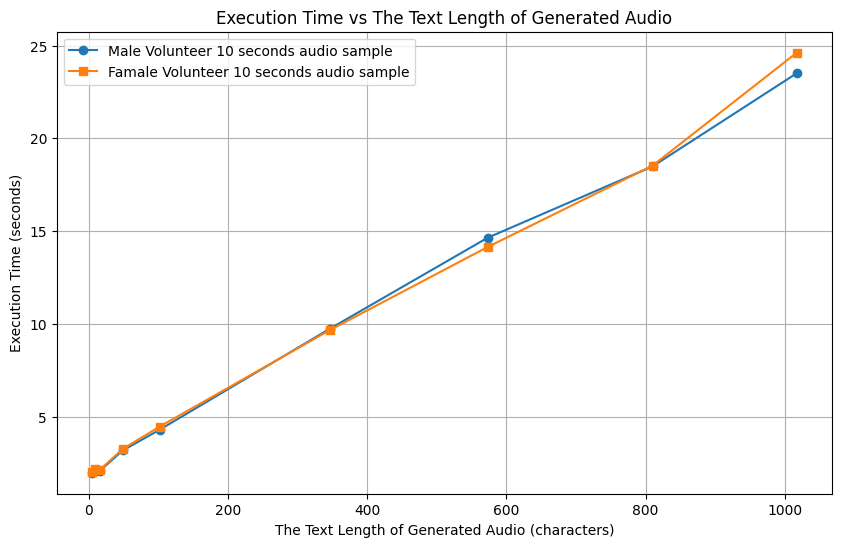

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(text_length_list, exec_time_vs_text_length_steven_10, marker='o', label='Male Volunteer 10 seconds audio sample')
plt.plot(text_length_list, exec_time_vs_text_length_zoe_10, marker='s', label='Famale Volunteer 10 seconds audio sample')

plt.xlabel('The Text Length of Generated Audio (characters)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs The Text Length of Generated Audio')
plt.legend()
plt.grid(True)
plt.show()


### Trial two: Different input auido length vs execution time ###

In [54]:
import time
exec_times_various_input_audio_length_steven = []
exec_times_various_input_audio_length_zoe = []

audiolist_steven = ["voice_samples/steven/10.wav", "voice_samples/steven/16.wav", "voice_samples/steven/18.wav", "voice_samples/steven/19.wav",
                    "voice_samples/steven/35.wav", "voice_samples/steven/106.wav"] 
audiolist_zoe = ["voice_samples/zoe/10.wav", "voice_samples/zoe/13.wav", "voice_samples/zoe/18.wav", "voice_samples/zoe/21.wav",
                 "voice_samples/zoe/33.wav", "voice_samples/zoe/117.wav"]

audio_lengths_steven = [10,16,18,19,35,106]
audio_lengths_zoe = [10,13,18,21,33,117]

for audio in audiolist_steven:
    execution_time = avg_execution_time(audio, "Hi, how are you.")
    exec_times_various_input_audio_length_steven.append(execution_time)
print(exec_times_various_input_audio_length_steven)

for audio in audiolist_zoe:
    execution_time = avg_execution_time(audio, "Hi, how are you.")
    exec_times_various_input_audio_length_zoe.append(execution_time)
print(exec_times_various_input_audio_length_zoe)

/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 10.112)]
after vad: dur = 10.112
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 16.4266875)]
after vad: dur = 16.426
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 16.4266875)]
after vad: dur = 16.426
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 16.4266875)]
after vad: dur = 16.426
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 16.4266875)]
after vad: dur = 16.426
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 16.4266875)]
after vad: dur = 16.426
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 18.944)]
after vad: dur = 18.944
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 18.944)]
after vad: dur = 18.944
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 18.944)]
after vad: dur = 18.944
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 18.944)]
after vad: dur = 18.944
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 18.944)]
after vad: dur = 18.944
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.584)]
after vad: dur = 19.584
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.584)]
after vad: dur = 19.584
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.584)]
after vad: dur = 19.584
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.584)]
after vad: dur = 19.584
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 19.584)]
after vad: dur = 19.584
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 35.3066875)]
after vad: dur = 35.306
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 35.3066875)]
after vad: dur = 35.306
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 35.3066875)]
after vad: dur = 35.306
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 35.3066875)]
after vad: dur = 35.306
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 35.3066875)]
after vad: dur = 35.306
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 106.1546875)]
after vad: dur = 106.154
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 106.1546875)]
after vad: dur = 106.154
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 106.1546875)]
after vad: dur = 106.154
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 106.1546875)]
after vad: dur = 106.154
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 106.1546875)]
after vad: dur = 106.154
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!
[2.2599321842193603, 2.183177185058594, 2.273859405517578, 2.2512588500976562, 2.547216606140137, 3.764900636672974]


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.174, 10.6453125)]
after vad: dur = 10.471
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 13.696)]
after vad: dur = 13.696
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 13.696)]
after vad: dur = 13.696
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 13.696)]
after vad: dur = 13.696
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 13.696)]
after vad: dur = 13.696
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 13.696)]
after vad: dur = 13.696
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 18.5173125)]
after vad: dur = 18.517
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 18.5173125)]
after vad: dur = 18.517
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 18.5173125)]
after vad: dur = 18.517
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 18.5173125)]
after vad: dur = 18.517
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 18.5173125)]
after vad: dur = 18.517
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 21.1626875)]
after vad: dur = 21.162
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 21.1626875)]
after vad: dur = 21.162
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 21.1626875)]
after vad: dur = 21.162
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 21.1626875)]
after vad: dur = 21.162
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 21.1626875)]
after vad: dur = 21.162
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 33.6213125)]
after vad: dur = 33.621
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 33.6213125)]
after vad: dur = 33.621
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 33.6213125)]
after vad: dur = 33.621
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 33.6213125)]
after vad: dur = 33.621
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 33.6213125)]
after vad: dur = 33.621
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 117.8666875)]
after vad: dur = 117.866
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 117.8666875)]
after vad: dur = 117.866
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 117.8666875)]
after vad: dur = 117.866
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 117.8666875)]
after vad: dur = 117.866
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!


/opt/anaconda3/envs/openvoice/lib/python3.9/site-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


Loaded checkpoint 'checkpoints/base_speakers/EN/checkpoint.pth'
missing/unexpected keys: [] []
Loaded checkpoint 'checkpoints/converter/checkpoint.pth'
missing/unexpected keys: [] []
OpenVoice version: v1
[(0.0, 117.8666875)]
after vad: dur = 117.866
 > Text splitted to sentences.
Hi, how are you.
 > ===========================
haɪ, haʊ əɹ ju.
 length:15
 length:15
Audio too short, fail to add watermark
Cloned Voice Generated!
[2.1895235538482667, 2.1511511325836183, 2.25831298828125, 2.3060425758361816, 2.6390761852264406, 3.987819719314575]


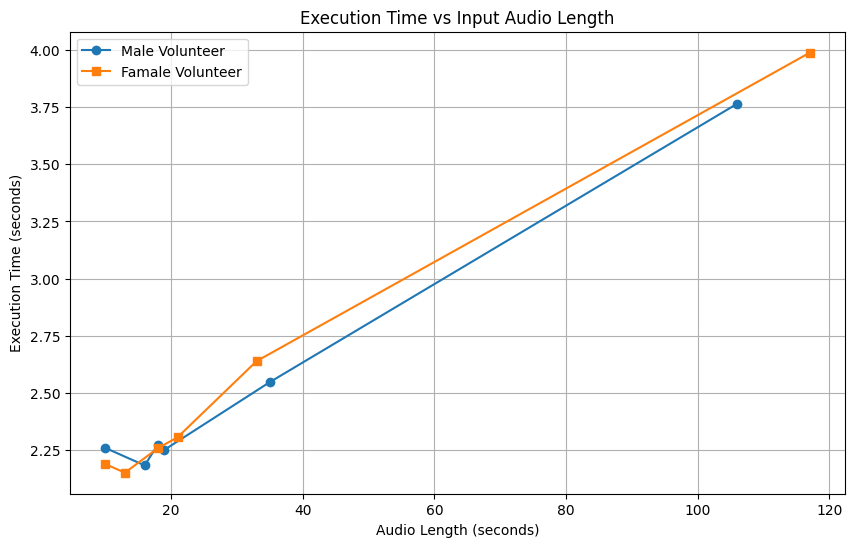

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(audio_lengths_steven, exec_times_various_input_audio_length_steven, marker='o', label='Male Volunteer')
plt.plot(audio_lengths_zoe, exec_times_various_input_audio_length_zoe, marker='s', label='Famale Volunteer')

plt.xlabel('Audio Length (seconds)')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time vs Input Audio Length')
plt.legend()
plt.grid(True)
plt.show()
